<a href="https://colab.research.google.com/github/francillco34/Entregas/blob/main/Tarea6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

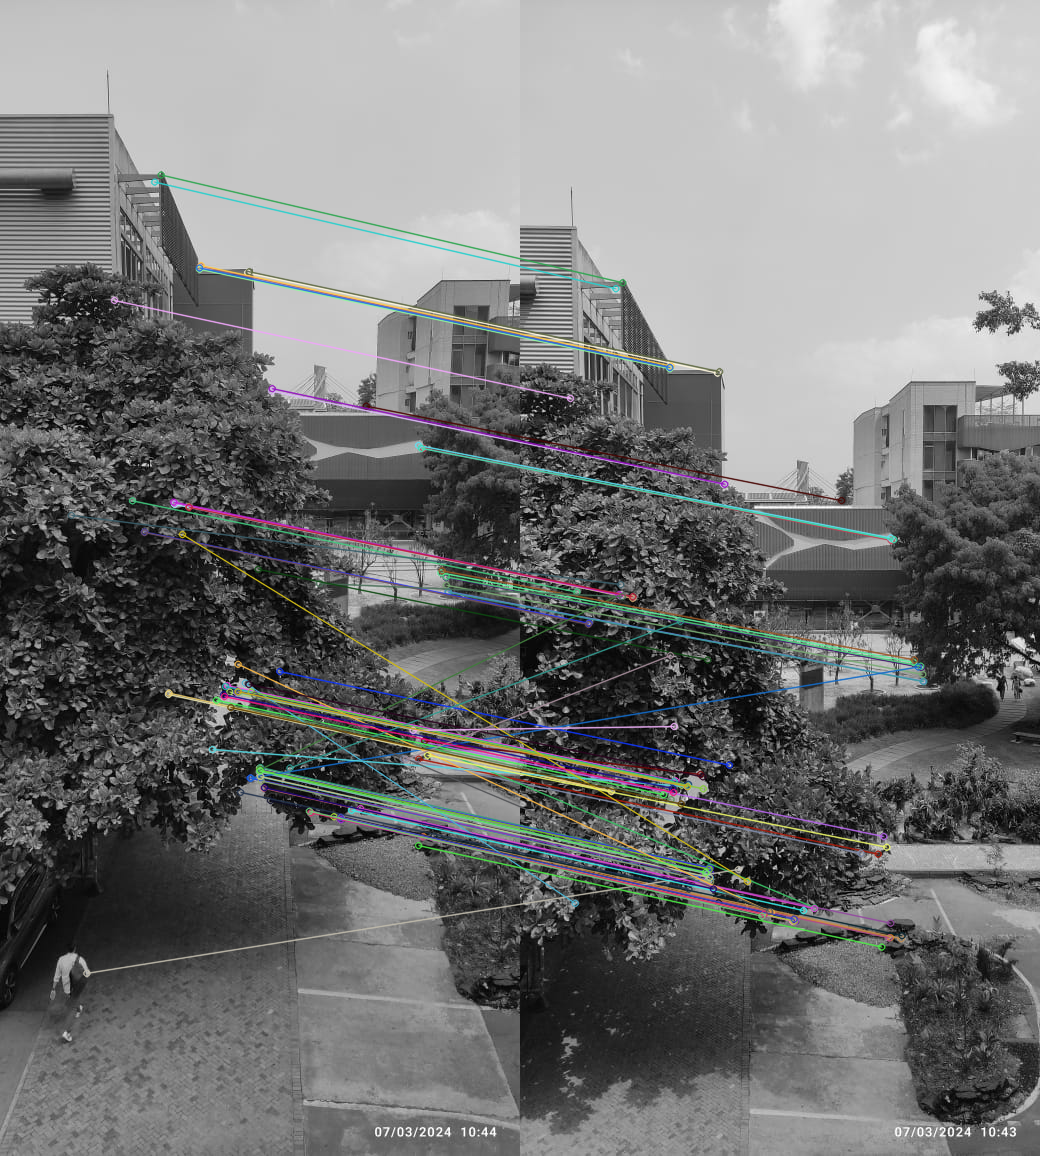

In [4]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
# Cargar las imágenes
img1 = cv2.imread('/content/IMG-20240307-WA0004.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('/content/IMG-20240307-WA0005.jpg', cv2.IMREAD_GRAYSCALE)

# Inicializar el detector ORB
orb = cv2.ORB_create()

# Encontrar los puntos clave y sus descriptores para ambas imágenes
keypoints1, descriptors1 = orb.detectAndCompute(img1, None)
keypoints2, descriptors2 = orb.detectAndCompute(img2, None)

# Inicializar el objeto de coincidencia de fuerza bruta
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Realizar la coincidencia de los descriptores
matches = bf.match(descriptors1, descriptors2)

# Ordenar las coincidencias por distancia
matches = sorted(matches, key=lambda x: x.distance)

# Elegir solo las mejores coincidencias
good_matches = matches[:100]  # Puedes ajustar este número según tus necesidades

# Dibujar los emparejamientos en una nueva imagen
matching_result = cv2.drawMatches(img1, keypoints1, img2, keypoints2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Mostrar la imagen con los emparejamientos
cv2_imshow(matching_result)



In [5]:
import cv2
import numpy as np

def brute_force_match(img1, img2):
    # Inicializar el detector ORB
    orb = cv2.ORB_create()

    # Encontrar los puntos clave y sus descriptores para ambas imágenes
    keypoints1, descriptors1 = orb.detectAndCompute(img1, None)
    keypoints2, descriptors2 = orb.detectAndCompute(img2, None)

    # Inicializar el objeto de coincidencia de fuerza bruta
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    # Realizar la coincidencia de los descriptores
    matches = bf.match(descriptors1, descriptors2)

    # Ordenar las coincidencias por distancia
    matches = sorted(matches, key=lambda x: x.distance)

    # Elegir solo las mejores coincidencias
    good_matches = matches[:50]  # Puedes ajustar este número según tus necesidades

    return keypoints1, keypoints2, good_matches

def compute_homography_matrix(keypoints1, keypoints2, good_matches):
    # Extraer las ubicaciones de los puntos clave correspondientes de las mejores coincidencias
    src_pts = np.float32([keypoints1[match.queryIdx].pt for match in good_matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([keypoints2[match.trainIdx].pt for match in good_matches]).reshape(-1, 1, 2)

    # Calcular la matriz de homografía
    homography_matrix, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

    return homography_matrix

# Cargar las imágenes
img1 = cv2.imread('/content/IMG-20240307-WA0004.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('/content/IMG-20240307-WA0005.jpg', cv2.IMREAD_GRAYSCALE)

# Realizar la coincidencia con fuerza bruta
keypoints1, keypoints2, good_matches = brute_force_match(img1, img2)

# Calcular la matriz de homografía
homography_matrix = compute_homography_matrix(keypoints1, keypoints2, good_matches)

print("Matriz de Homografía:")
print(homography_matrix)


Matriz de Homografía:
[[ 1.06614188e+00 -4.80340425e-02 -6.30531881e+01]
 [ 1.92449101e-02  9.12188410e-01  1.08070426e+02]
 [ 4.27200890e-05 -9.56132163e-05  1.00000000e+00]]


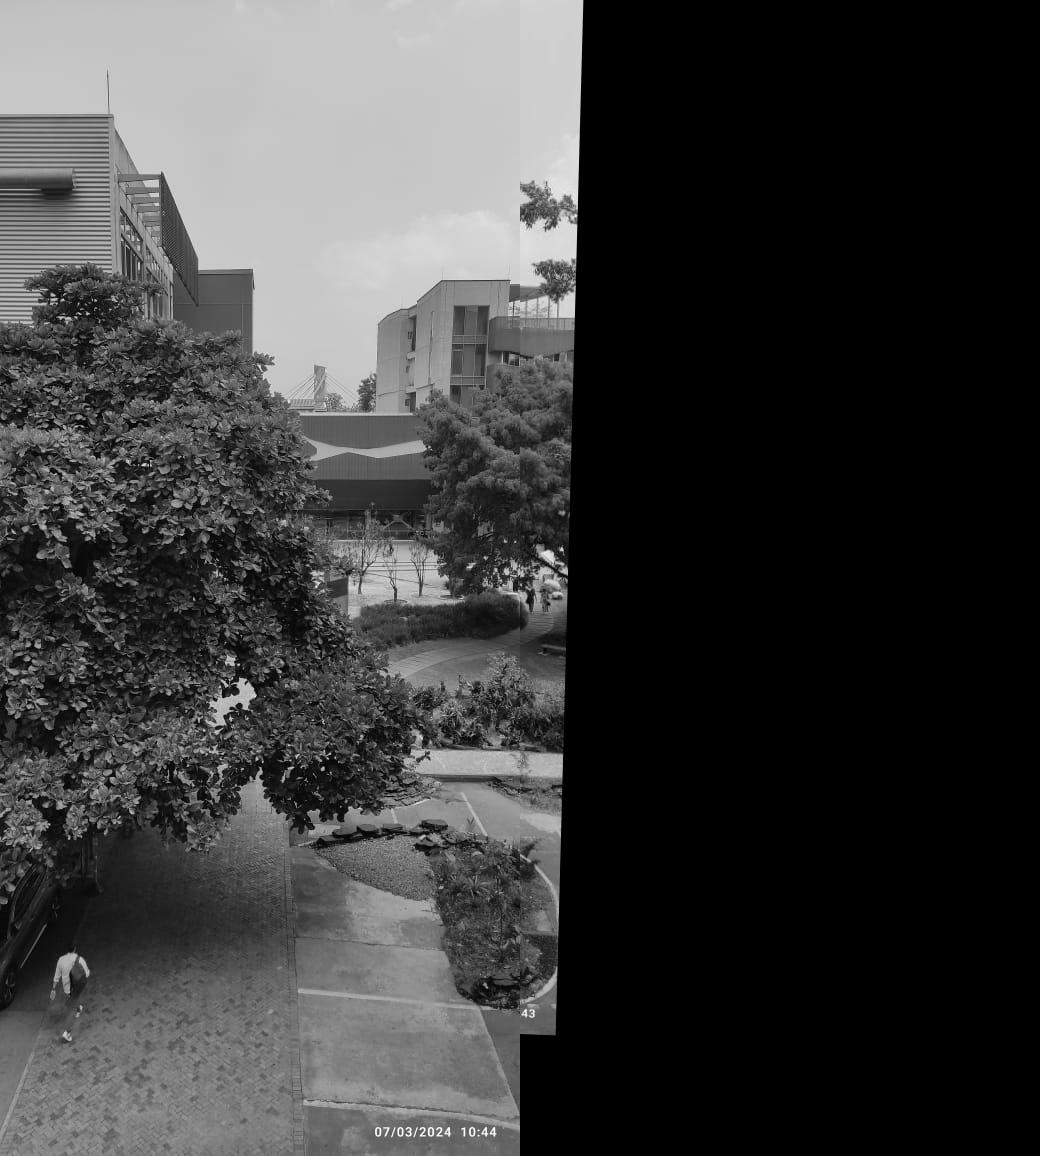

In [13]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def create_panorama(img1, img2):
    # Inicializar el detector ORB
    orb = cv2.ORB_create()

    # Encontrar los puntos clave y sus descriptores para ambas imágenes
    keypoints1, descriptors1 = orb.detectAndCompute(img1, None)
    keypoints2, descriptors2 = orb.detectAndCompute(img2, None)

    # Inicializar el objeto de coincidencia de fuerza bruta
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    # Realizar la coincidencia de los descriptores
    matches = bf.match(descriptors1, descriptors2)

    # Ordenar las coincidencias por distancia
    matches = sorted(matches, key=lambda x: x.distance)

    # Elegir solo las mejores coincidencias
    good_matches = matches[:100]  # Puedes ajustar este número según tus necesidades

    # Convertir los puntos clave en formato numpy array
    src_pts = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

    # Calcular la matriz de homografía
    H, _ = cv2.findHomography(dst_pts, src_pts, cv2.RANSAC, 5.0)

    # Deformar la segunda imagen para alinearla con la primera
    img2_aligned = cv2.warpPerspective(img2, H, (img1.shape[1] + img2.shape[1], img1.shape[0]))

    # Superponer las imágenes
    img2_aligned[0:img1.shape[0], 0:img1.shape[1]] = img1

    return img2_aligned

# Cargar las imágenes
img1 = cv2.imread('/content/IMG-20240307-WA0004.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('/content/IMG-20240307-WA0005.jpg', cv2.IMREAD_GRAYSCALE)

# Crear la foto panorámica
panorama = create_panorama(img1, img2)

# Mostrar la foto panorámica
cv2_imshow(panorama)



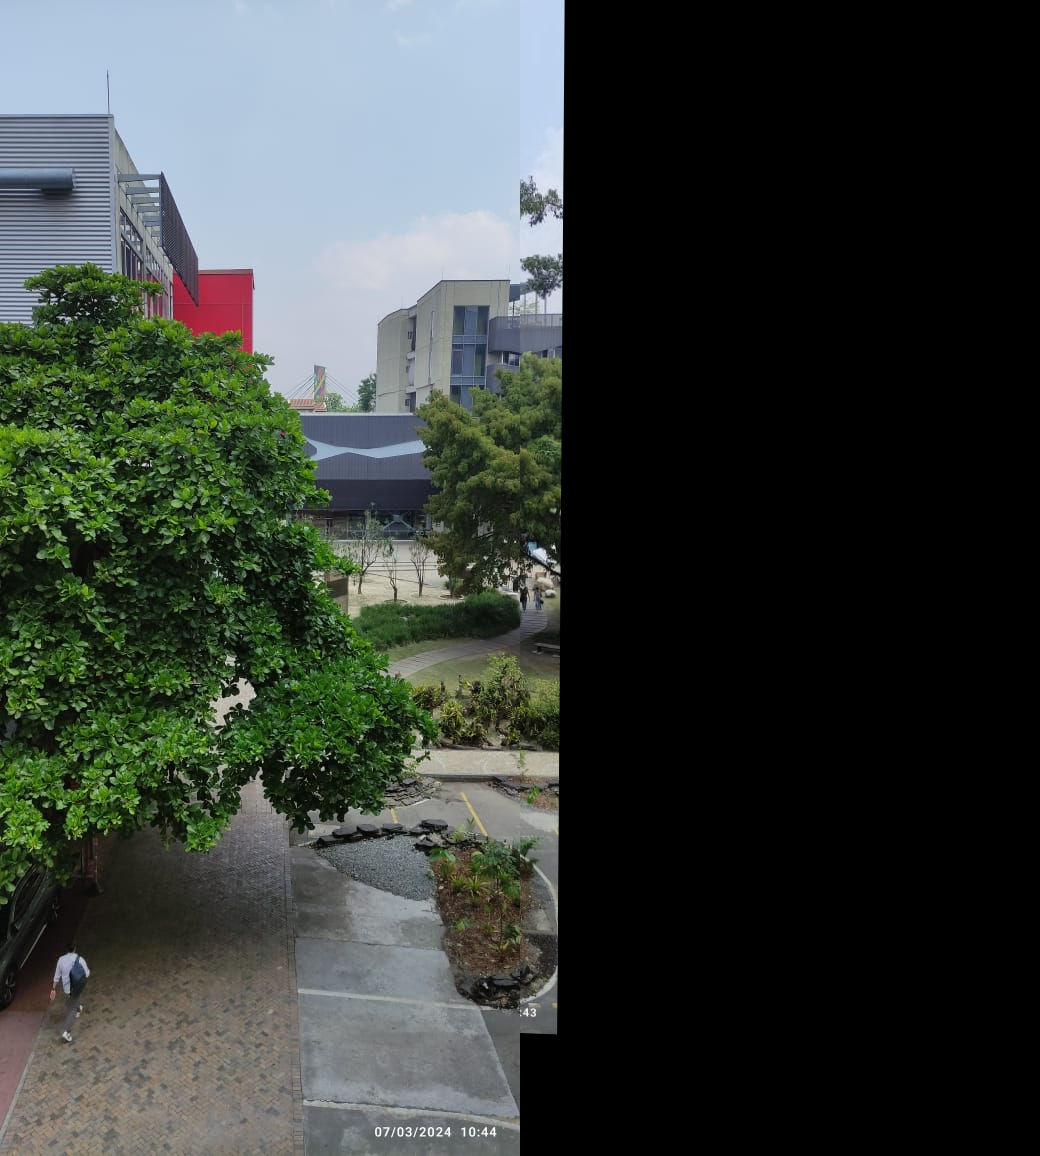

In [14]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def create_panorama(img1, img2):
    # Inicializar el detector ORB
    orb = cv2.ORB_create()

    # Encontrar los puntos clave y sus descriptores para ambas imágenes
    keypoints1, descriptors1 = orb.detectAndCompute(img1, None)
    keypoints2, descriptors2 = orb.detectAndCompute(img2, None)

    # Inicializar el objeto de coincidencia de fuerza bruta
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    # Realizar la coincidencia de los descriptores
    matches = bf.match(descriptors1, descriptors2)

    # Ordenar las coincidencias por distancia
    matches = sorted(matches, key=lambda x: x.distance)

    # Elegir solo las mejores coincidencias
    good_matches = matches[:100]  # Puedes ajustar este número según tus necesidades

    # Convertir los puntos clave en formato numpy array
    src_pts = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

    # Calcular la matriz de homografía
    H, _ = cv2.findHomography(dst_pts, src_pts, cv2.RANSAC, 5.0)

    # Deformar la segunda imagen para alinearla con la primera
    img2_aligned = cv2.warpPerspective(img2, H, (img1.shape[1] + img2.shape[1], img1.shape[0]))

    # Superponer las imágenes
    img2_aligned[0:img1.shape[0], 0:img1.shape[1]] = img1

    return img2_aligned

# Cargar las imágenes
img1 = cv2.imread('/content/IMG-20240307-WA0004.jpg')
img2 = cv2.imread('/content/IMG-20240307-WA0005.jpg')

# Crear la foto panorámica
panorama = create_panorama(img1, img2)

# Mostrar la foto panorámica
cv2_imshow(panorama)
cv2_imshow(panorama)


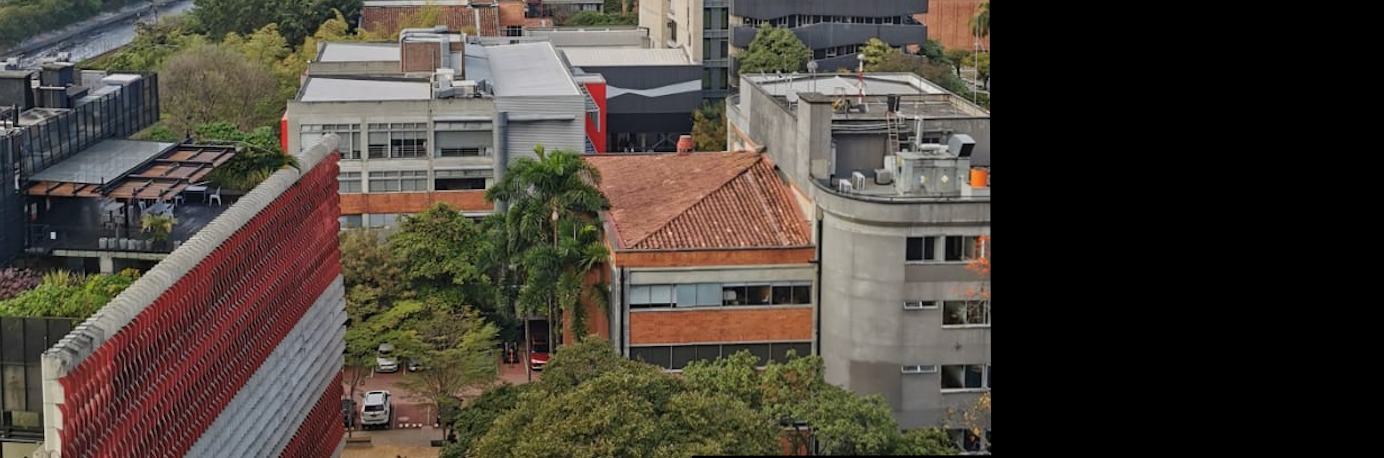

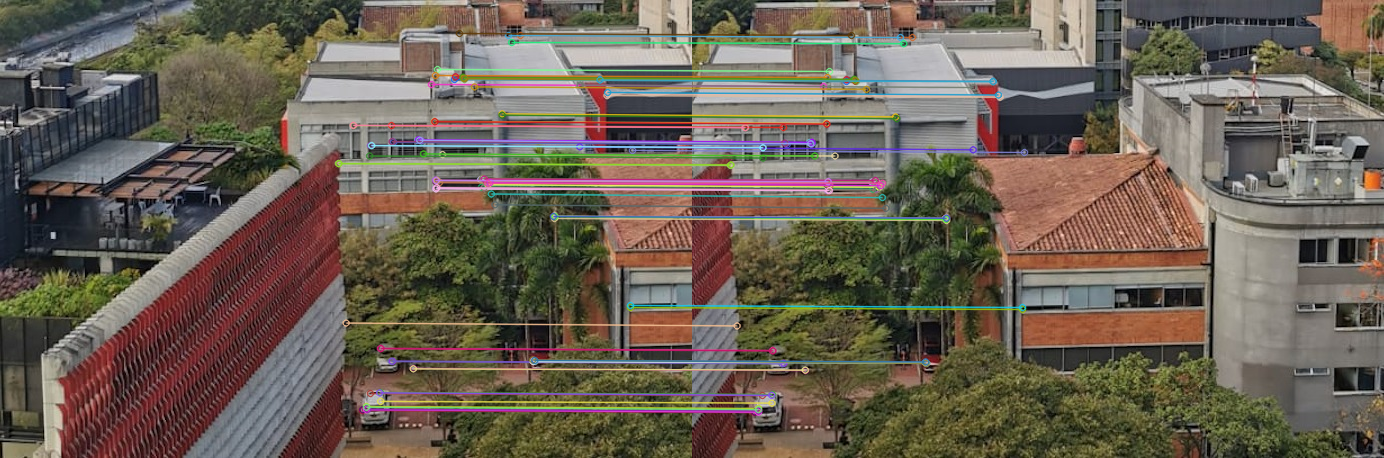

In [17]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def create_panorama(img1, img2):
    # Inicializar el detector ORB
    orb = cv2.ORB_create()

    # Encontrar los puntos clave y sus descriptores para ambas imágenes
    keypoints1, descriptors1 = orb.detectAndCompute(img1, None)
    keypoints2, descriptors2 = orb.detectAndCompute(img2, None)

    # Inicializar el objeto de coincidencia de fuerza bruta
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    # Realizar la coincidencia de los descriptores
    matches = bf.match(descriptors1, descriptors2)

    # Ordenar las coincidencias por distancia
    matches = sorted(matches, key=lambda x: x.distance)

    # Elegir solo las mejores coincidencias
    good_matches = matches[:100]  # Puedes ajustar este número según tus necesidades

    # Dibujar los emparejamientos en una nueva imagen
    matching_result = cv2.drawMatches(img1, keypoints1, img2, keypoints2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # Convertir los puntos clave en formato numpy array
    src_pts = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

    # Calcular la matriz de homografía
    H, _ = cv2.findHomography(dst_pts, src_pts, cv2.RANSAC, 5.0)

    # Deformar la segunda imagen para alinearla con la primera
    img2_aligned = cv2.warpPerspective(img2, H, (img1.shape[1] + img2.shape[1], img1.shape[0]))

    # Superponer las imágenes
    img2_aligned[0:img1.shape[0], 0:img1.shape[1]] = img1

    return img2_aligned, matching_result

# Cargar las imágenes
img1 = cv2.imread('/content/Imagen2.jpg')
img2 = cv2.imread('/content/Imagen1.jpg')

# Crear la foto panorámica y obtener los emparejamientos dibujados
panorama, matching_result = create_panorama(img1, img2)

# Mostrar la foto panorámica y los emparejamientos
cv2_imshow(panorama)
cv2_imshow(matching_result)

